#  Loan Eligibility Prediction Using Classification Mode

In [1]:
# Importing Required Libraries

# Data Loading & Pre-processing
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Loading & Pre-processing

In [2]:
# Loading Dataset
data = pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
# Viewing Top 5 Rows or Dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Check Data Contains NULL/NaN values
data.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [5]:
# Checking Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value           4269 non-null   int64 
 12  loan_status                4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Data Visualization

In [6]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

<Axes: xlabel='count', ylabel='loan_status'>

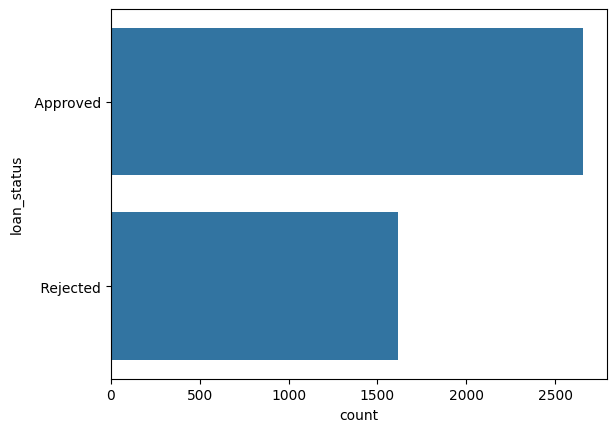

In [7]:
sns.countplot(data['loan_status'])

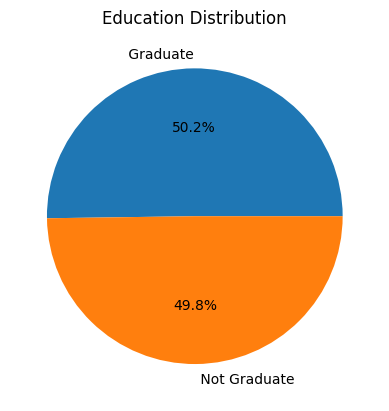

In [8]:
# pie chart for education
data[' education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')
plt.ylabel('')
plt.show()

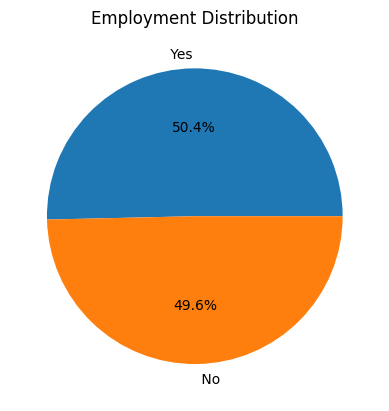

In [9]:
# pie chart for education
data[' self_employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Employment Distribution')
plt.ylabel('')
plt.show()

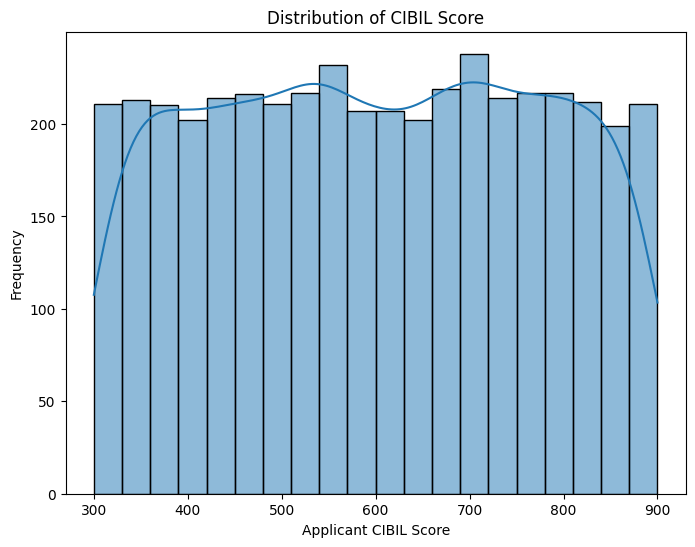

In [10]:
# Chart of CIBIL Score
plt.figure(figsize=(8, 6))
sns.histplot(data[' cibil_score'], bins=20, kde=True)
plt.title('Distribution of CIBIL Score')
plt.xlabel('Applicant CIBIL Score')
plt.ylabel('Frequency')
plt.show()